In [264]:
import numpy as np
import matplotlib.pyplot as plt

# Simple Linear Regression (1 independent variable + 1 target variable)

## Experiment with Original Data

### Load Data

In [265]:
# load package for loading data
import pandas as pd

df = pd.read_csv("boston_housing.csv")
# print(df.head())


In [266]:
housing_dataset = df['RM'].values
housing_dataset = housing_dataset.reshape(-1, 1)
print(housing_dataset)

[[6.575]
 [6.421]
 [7.185]
 [6.998]
 [7.147]
 [6.43 ]
 [6.012]
 [6.172]
 [5.631]
 [6.004]
 [6.377]
 [6.009]
 [5.889]
 [5.949]
 [6.096]
 [5.834]
 [5.935]
 [5.99 ]
 [5.456]
 [5.727]
 [5.57 ]
 [5.965]
 [6.142]
 [5.813]
 [5.924]
 [5.599]
 [5.813]
 [6.047]
 [6.495]
 [6.674]
 [5.713]
 [6.072]
 [5.95 ]
 [5.701]
 [6.096]
 [5.933]
 [5.841]
 [5.85 ]
 [5.966]
 [6.595]
 [7.024]
 [6.77 ]
 [6.169]
 [6.211]
 [6.069]
 [5.682]
 [5.786]
 [6.03 ]
 [5.399]
 [5.602]
 [5.963]
 [6.115]
 [6.511]
 [5.998]
 [5.888]
 [7.249]
 [6.383]
 [6.816]
 [6.145]
 [5.927]
 [5.741]
 [5.966]
 [6.456]
 [6.762]
 [7.104]
 [6.29 ]
 [5.787]
 [5.878]
 [5.594]
 [5.885]
 [6.417]
 [5.961]
 [6.065]
 [6.245]
 [6.273]
 [6.286]
 [6.279]
 [6.14 ]
 [6.232]
 [5.874]
 [6.727]
 [6.619]
 [6.302]
 [6.167]
 [6.389]
 [6.63 ]
 [6.015]
 [6.121]
 [7.007]
 [7.079]
 [6.417]
 [6.405]
 [6.442]
 [6.211]
 [6.249]
 [6.625]
 [6.163]
 [8.069]
 [7.82 ]
 [7.416]
 [6.727]
 [6.781]
 [6.405]
 [6.137]
 [6.167]
 [5.851]
 [5.836]
 [6.127]
 [6.474]
 [6.229]
 [6.195]
 

### Train-Test Set Spliting

Requirement:
* Use the average number of rooms (RM) to estimate the house price (MEDV)
* Split training, testing set with ratio 7:3 and random state = 42

In [267]:
X = housing_dataset
y = df['MEDV'].values
# keep target as 1D array to avoid accidental 2D broadcasting issues later
# y = y.ravel()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.reshape(-1, 1)
y = scaler.fit_transform(y)
y = y.ravel()


In [268]:
# load package for spliting data
from sklearn.model_selection import train_test_split
# X_train, tmp1, y_train, tmp2 = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X_val, X_test, y_val, y_test = train_test_split(tmp1, tmp2, test_size = 0.5, random_state = 42)

In [269]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Data Visualization

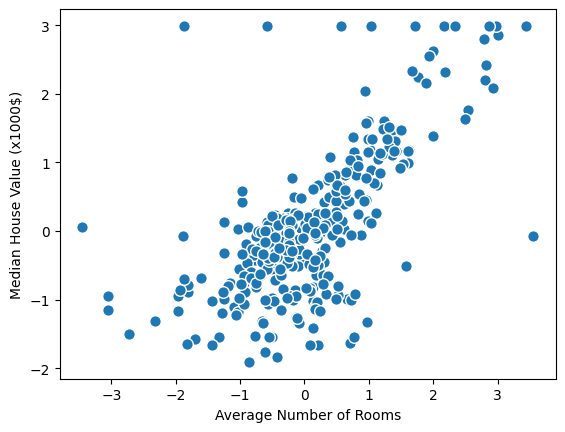

In [270]:
# visualize data
# xlabel: 'Average Number of Rooms'; ylabel: 'Median House Value (x1000$)'
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
# plt.xlabel('')
# plt.ylabel('...')
plt.show()

### Linear Regression (Base)

In [271]:
class LinearRegression_GD:
  def __init__ (self, eta = 0.001, max_iter = 20, random_state = 42):
    self.eta = eta # Learning rate
    self.max_iter = max_iter # Num epochs
    np.random.seed(random_state) # Set the seed for np for the initializing param steps
    self.random_state = random_state
    self.w = None
    self.costs = [] # store cost of each epoch

  def predict(self, X):
    # get the prediction
    return np.dot(X, self.w[1:]) + self.w[0]

  def fit(self, X, y):
    # Initialize W and b
    rgen = np.random.RandomState(self.random_state)
    self.w = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
    self.costs = []
    for n_iters in range (self.max_iter):
      # get the prediction
      y_pred = self.predict(X)
      # calculate the diff between ground truth and prediction
      diff = y - y_pred
      # update bias
      self.w[0] += self.eta * np.sum(diff)
      # update weights
      self.w[1:] += self.eta * np.dot(X.T,diff)
      # calculate the loss
      cost = np.sum(diff ** 2) / 2
      self.costs.append(cost)

      #takes no arguments

### Gradient Descent

In [272]:

# Initialize the model
reg_GD = LinearRegression_GD(eta=1e-3, max_iter=200, random_state=42)
# Train model
reg_GD.fit(X, y)


- Requirement: Experiment with
-- Different learning rate values: eta = {1e-2, 1e-3, 1e-4}
-- Maximum number of iterations = 200
-- Random state = 42
- What is the suitable 'learning rate' value?

In [273]:
# print(X_train.shape, y_train.shape)

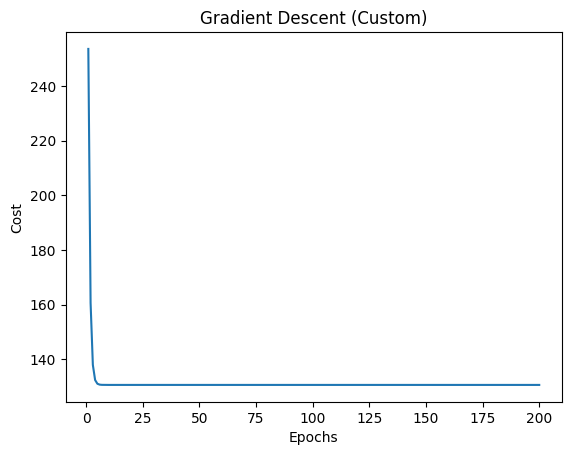

In [274]:

# Visualize the cost trend for custom gradient descent
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent (Custom)')
plt.show()

Visualize the prediction of Gradient Descent model on Training Data

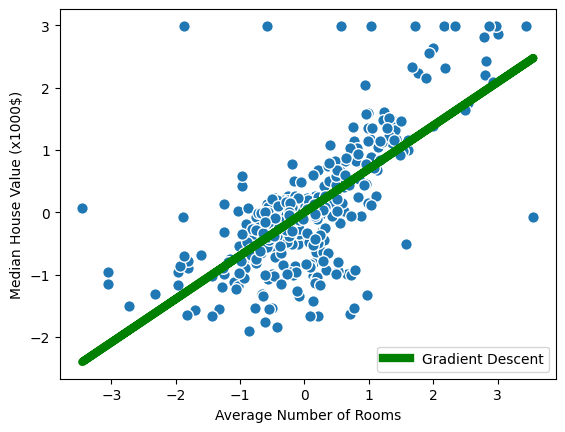

In [275]:
plt.scatter(X_train, y_train, facecolor='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [276]:
w_GD = reg_GD.w
print('Weight from Gradient Descent:', w_GD)

Weight from Gradient Descent: [-4.85260361e-16  6.95359947e-01]


### Stochastic Gradient Descent

In [277]:
from sklearn.metrics import mean_squared_error
# How to import Stochastic Gradient Descent model from sklearn
from sklearn.linear_model import SGDRegressor
# Initialize the model
# reg_SGD = SGDRegressor(max_iter = 1000, tol = 1e-3, learning_rate = 'invscaling', eta0 = 0.01)

- Requirement: Experiment with
-- Different learning rate values: eta0 = 1e-4
-- Maximum number of iterations = 200
-- Random state = 42

In [278]:
# Initialize the model
reg_SGD = SGDRegressor(max_iter=20, learning_rate='constant', eta0=0.001, random_state=42)
# Train model
reg_SGD.fit(X_train, y_train)

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,20
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


Visualize the prediction of Stochastic Gradient Descent model on Training Data

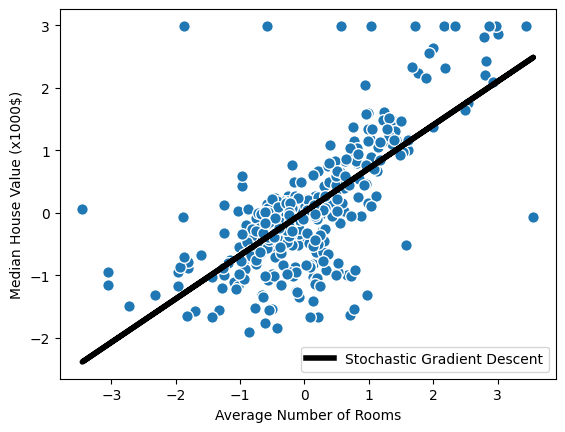

In [279]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

In [280]:
# def accuracy(y_true, y_pred):
#     mse = mean_squared_error(y_true, y_pred)
#     rmse = np.sqrt(mse)
#     return rmse
# print(f"SGD train cost: {accuracy(y_train, reg_SGD.predict(X_train))}")
# print(f"SGD test cost: {accuracy(y_test, reg_SGD.predict(X_test))}")


### Normal Equation (sklearn)

In [281]:
from sklearn.linear_model import LinearRegression


In [282]:
# Intialize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


Visualize the prediction of Normal Equation model on Training Data

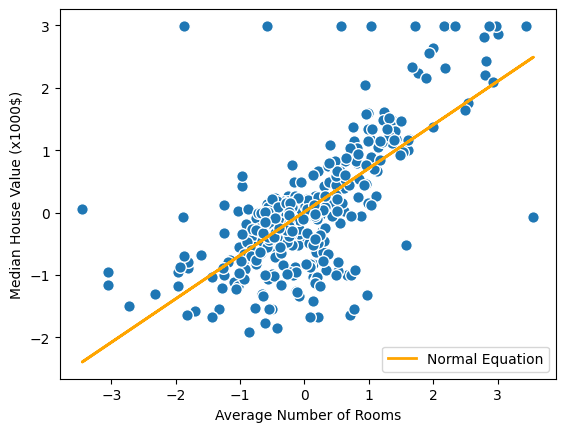

In [283]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

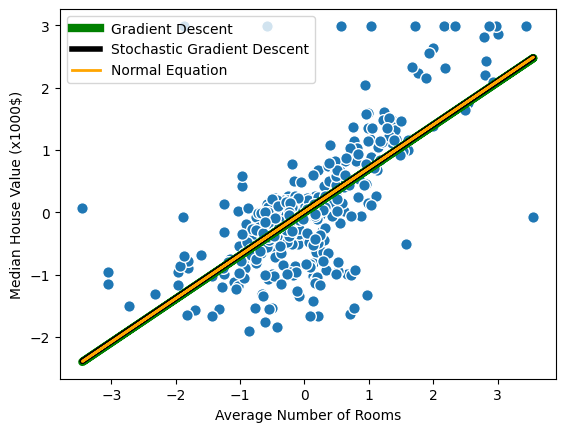

In [284]:
plt.scatter(X_train, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train, reg_GD.predict(X_train), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train, reg_SGD.predict(X_train), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train, reg_NE.predict(X_train), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

Weight Comparisions

In [285]:
w_GD = reg_GD.w
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
print(w_GD)
print(w_SGD)
print(w_NE)

[-4.85260361e-16  6.95359947e-01]
[0.01312594 0.69537994]
[0.01184422 0.69658176]


Performance Comparisons (on Testing Set)

In [286]:
y_pred_GD = reg_GD.predict(X_test)

In [287]:
y_pred_SGD = reg_SGD.predict(X_test)

In [288]:
y_pred_NE = reg_NE.predict(X_test)

In [289]:
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2

In [290]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 0.468835
MAE of SGD: 0.469713
MAE of NE: 0.469549


In [291]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 0.477181
MSE of SGD: 0.478082
MSE of NE: 0.477987


In [292]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.459378
R2 of SGD: 0.458358
R2 of NE: 0.458465


## Experiment with Standardized Data

In [303]:
# Re-load the dataset
housing_dataset = pd.read_csv("boston_housing.csv")
# print(housing_dataset)

In [304]:
# load the package for standardizing data (Standard Scaler)
from sklearn.preprocessing import StandardScaler


In [309]:
# Standardize the 'RM' column using the DataFrame 'df'
scaler = StandardScaler()
df['RM'] = scaler.fit_transform(df[['RM']])

In [310]:
# X_new <- 'RM' column, y <- 'MEDV' column
X_new = df['RM'].values.reshape(-1, 1)
y = df['MEDV'].values

In [311]:
# Train-test spliting (7:3, random state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

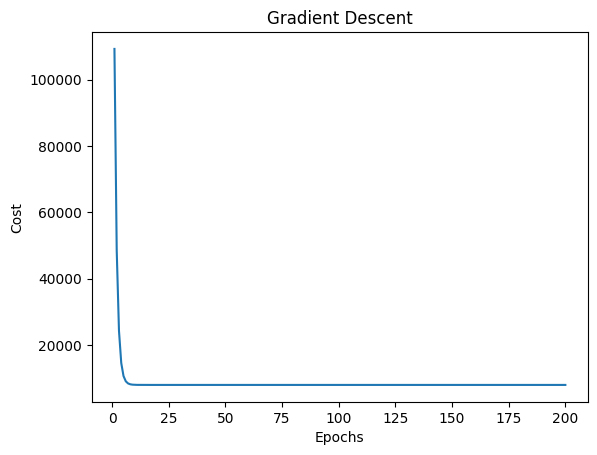

In [312]:
# Initalize the Gradient Descent model with: learning rate = 1e-3, max_iter = 200, random_state = 42
reg_GD = LinearRegression_GD(eta=1e-3, max_iter = 200, random_state=42)

# Train model on standardized data
reg_GD.fit(X_train_norm, y_train)


# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()


Visualize the prediction of Gradient Descent model on Training Data



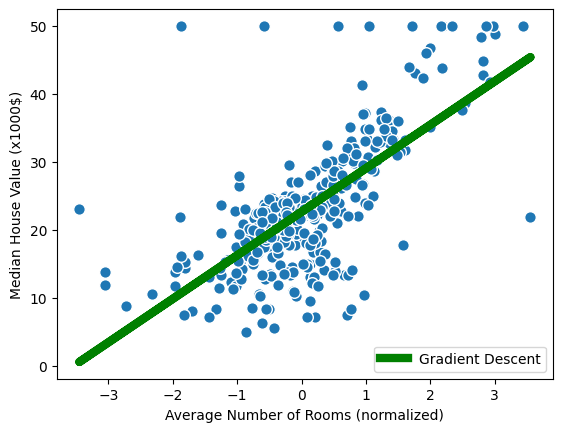

In [314]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Stochastic Gradient Descent

In [315]:
# Initalize the Stochastic Gradient Descent model with: eta0 = 1e-3, max_iter = 200, random_state=42, learning_rate = 'constant'
reg_SGD = SGDRegressor(max_iter=20, learning_rate='constant', eta0=0.001, random_state=42)

# Train SGD model on standardized data
reg_SGD.fit(X_train_norm, y_train)

c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,20
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


Visualize the prediction of Stochastic Gradient Descent model on Training Data


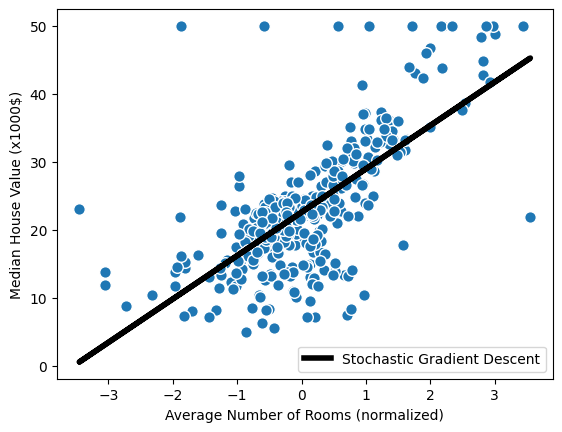

In [316]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Normal Equation (sklearn)

In [318]:
# Initalize the Normal Equation model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


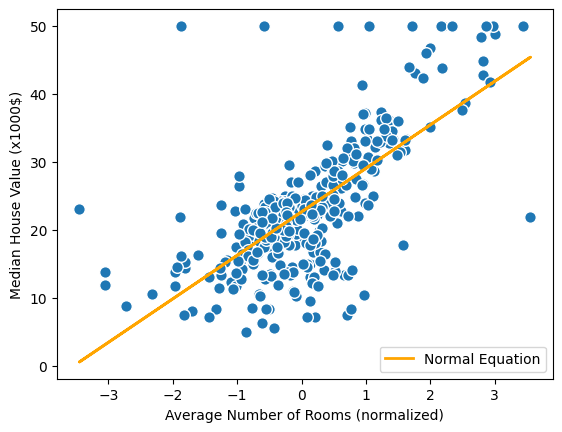

In [319]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Visualize all models on Training Data

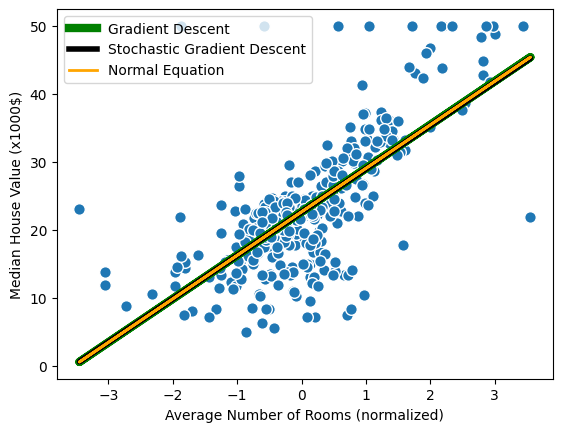

In [320]:
plt.scatter(X_train_norm, y_train, c='tab:blue', edgecolor='white', s=70)
plt.plot(X_train_norm, reg_NE.predict(X_train_norm), color='green', lw=6, label='Gradient Descent')
plt.plot(X_train_norm, reg_SGD.predict(X_train_norm), color='black', lw=4, label='Stochastic Gradient Descent')
plt.plot(X_train_norm, reg_GD.predict(X_train_norm), color='orange', lw=2, label='Normal Equation')
plt.xlabel('Average Number of Rooms (normalized)')
plt.ylabel('Median House Value (x1000$)')
plt.legend()
plt.show()

### Algorithms Comparisons

In [322]:
w_GD = reg_GD.w
w_GD

array([22.64163118,  6.40020122])

In [326]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.59801497,  6.37849661])

In [327]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.64163118,  6.40020122])

In [328]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [329]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [330]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [331]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 4.314224
MAE of SGD: 4.312113
MAE of NE: 4.314224


In [332]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 40.35145
MSE of SGD: 40.320286
MSE of NE: 40.35145


In [333]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.458465
R2 of SGD: 0.458883
R2 of NE: 0.458465


# Multiple Linear Regression (n independent variable (n >=2) + 1 target variable)

## Experiment with normal data

In [335]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")

* X: 13 remaining variables (except 'MEDV' variable)
* y: 'MEDV' variable

In [337]:
X = housing_dataset.drop(columns=['MEDV']).values
y = housing_dataset['MEDV'].values

In [338]:
# Train-test set spliting with ratio 7:3, random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with:
-- max_iter = 200
-- random_state = 42
-- learning_rate (eta) = {1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8}
- What is the suitable learning rate value?

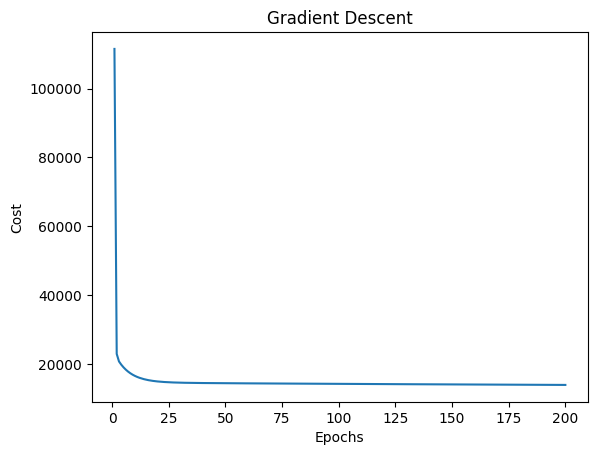

In [342]:
# Initalize the GD model
reg_GD = LinearRegression_GD(eta=1e-8, max_iter=200, random_state=42)

# Train model
reg_GD.fit(X_train, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [343]:
# Initialize the SGD model
reg_SGD = SGDRegressor(max_iter=20, learning_rate='constant', eta0=1e-8, random_state=42)

# Train model
reg_SGD.fit(X_train, y_train)

c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,20
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


### Normal Equation

In [ ]:
# # Add the '1' column to data
# X_b = np.c_[np.ones((X_train.shape[0], 1)), X_train]

In [355]:
# Intialize the NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Algorithms Comparisons

In [356]:
w_GD = reg_GD.w
w_GD

array([ 5.52332725e-03, -1.00445650e-02,  4.01250629e-02,  1.00675028e-02,
       -1.98428582e-03, -2.18108357e-03,  2.21876484e-02,  1.02575199e-02,
       -1.72587285e-03,  2.86076003e-03, -1.75953448e-03, -2.76731132e-05,
        6.16464657e-02, -3.74414463e-02])

In [357]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([ 1.50417148e-04, -1.63562988e-03,  6.62307765e-03, -5.68273621e-04,
        4.46834758e-05,  5.10729016e-05,  1.29311870e-03,  3.66778840e-03,
        9.25208955e-04, -1.04504325e-03,  4.11054446e-03,  1.95731858e-03,
        5.52571036e-02, -1.62019492e-03])

In [358]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([ 3.16310840e+01, -1.33470103e-01,  3.58089136e-02,  4.95226452e-02,
        3.11983512e+00, -1.54170609e+01,  4.05719923e+00, -1.08208352e-02,
       -1.38599824e+00,  2.42727340e-01, -8.70223437e-03, -9.10685208e-01,
        1.17941159e-02, -5.47113313e-01])

In [359]:
y_pred_GD = reg_GD.predict(X_test)

In [360]:
y_pred_SGD = reg_SGD.predict(X_test)

In [361]:
y_pred_NE = reg_NE.predict(X_test)

In [362]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 6.391988
MAE of SGD: 6.306459
MAE of NE: 3.16271


In [363]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 70.066239
MSE of SGD: 73.991921
MSE of NE: 21.517444


In [364]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.059679
R2 of SGD: 0.006994
R2 of NE: 0.711226


## Experiment with Standardized Data

In [ ]:
# Re-load dataset
housing_dataset = pd.read_csv("boston_housing.csv")


In [370]:
# Get the columns' names
name_columns = df.columns.values
name_columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype=object)

In [375]:
# Initialize the standardize scaler
scaler = StandardScaler()

# Standardize all independent variables
df[list(name_columns[:-1])] = scaler.fit_transform(df[list(name_columns[:-1])])

X_new <- 13 independent variables

y <- 'MEDV' column

In [376]:
X_new = df[name_columns[:-1]].values
y = df['MEDV'].values

In [378]:
# Split train-test set (7:3, random_state = 42)
X_train_norm, X_test_norm, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=42)

### Gradient Descent

- Experiment with following learning rates = {1e-3, 1e-5, 1e-4}
- max_iter = 200
- random_state = 42

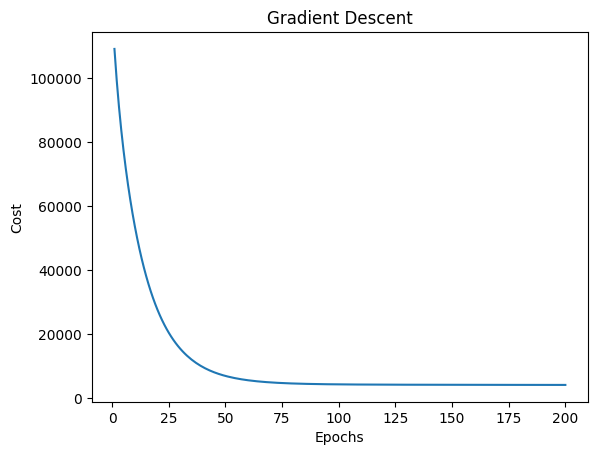

In [380]:
# Initalize the GD model
reg_GD = LinearRegression_GD(eta=1e-4, max_iter=200, random_state=42)

# Train model on normalized data
reg_GD.fit(X_train_norm, y_train)

# Visualize the cost trend
plt.plot(range(1, len(reg_GD.costs) + 1), reg_GD.costs)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.show()

### Stochastic Gradient Descent

In [384]:
# Initialize SGD model (eta0=1e-4, max_iter=200, random_state=42, learning_rate='constant')
reg_SGD = SGDRegressor(max_iter=200, learning_rate='constant', eta0=1e-4, random_state=42)

# Train model
reg_SGD.fit(X_train_norm, y_train)

c:\Users\vpthi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1579: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,200
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,random_state,42


### Normal Equation (sklearn)

In [385]:
# Initialize NE model
reg_NE = LinearRegression()

# Train model
reg_NE.fit(X_train_norm, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Algorithms Comparisons

In [386]:
w_GD = reg_GD.w
w_GD

array([22.4771051 , -0.94634802,  0.40285729, -0.05154522,  0.86403959,
       -1.10952874,  3.09171073, -0.39324812, -2.23150523,  0.88239876,
       -0.32128136, -1.86670471,  1.09814471, -3.79012233])

In [387]:
w_SGD = np.append(reg_SGD.intercept_, reg_SGD.coef_)
w_SGD

array([22.47521194, -0.94717769,  0.40179183, -0.05520802,  0.86619346,
       -1.10632008,  3.09329047, -0.39409591, -2.22833111,  0.87743613,
       -0.31647518, -1.86700159,  1.0987754 , -3.78831503])

In [389]:
w_NE = np.append(reg_NE.intercept_, reg_NE.coef_)
w_NE

array([22.50945471, -1.14691411,  0.83432605,  0.33940694,  0.79163612,
       -1.784727  ,  2.84783949, -0.30429306, -2.91562521,  2.11140045,
       -1.46519951, -1.9696347 ,  1.07567771, -3.90310727])

In [390]:
y_pred_GD = reg_GD.predict(X_test_norm)

In [391]:
y_pred_SGD = reg_SGD.predict(X_test_norm)

In [392]:
y_pred_NE = reg_NE.predict(X_test_norm)

In [393]:
print('MAE of GD:', round(MAE(y_test, y_pred_GD), 6))
print('MAE of SGD:', round(MAE(y_test, y_pred_SGD), 6))
print('MAE of NE:', round(MAE(y_test, y_pred_NE), 6))

MAE of GD: 3.207306
MAE of SGD: 3.207579
MAE of NE: 3.16271


In [394]:
print('MSE of GD:', round(MSE(y_test, y_pred_GD), 6))
print('MSE of SGD:', round(MSE(y_test, y_pred_SGD), 6))
print('MSE of NE:', round(MSE(y_test, y_pred_NE), 6))

MSE of GD: 22.914828
MSE of SGD: 22.927133
MSE of NE: 21.517444


In [395]:
print('R2 of GD:', round(R2(y_test, y_pred_GD), 6))
print('R2 of SGD:', round(R2(y_test, y_pred_SGD), 6))
print('R2 of NE:', round(R2(y_test, y_pred_NE), 6))

R2 of GD: 0.692472
R2 of SGD: 0.692307
R2 of NE: 0.711226


# Explain what $R^2$ coefficient is.

R2 coefficient là một số đo thống kê thể hiện mức độ phù hợp của mô hình hồi quy tuyến tính trong việc giải thích biến thiên của biến phụ thuộc dựa trên biến độc lập. Giá trị R2 nằm trong khoảng từ 0 đến 1, với 1 biểu thị mô hình hoàn hảo giải thích tất cả biến thiên của dữ liệu, và 0 biểu thị mô hình không giải thích được biến thiên nào.

R2 coefficient công thức là 1 - (SS_res / SS_tot) với SS_res là tổng bình phương sai số dư và SS_tot là tổng bình phương biến thiên tổng thể.

Cách để có được R2 coefficient là sử dụng hàm r2_score từ sklearn.metrics hoặc sử dụng phương pháp score() của các mô hình hồi quy trong scikit-learn.
